In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\user\Downloads\laliga_player_stats_english.csv')

In [3]:
df.head()

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,NaN,Hodei Oleaga,0.000,0,"0,0%",0,"0,0%",0,...,0,0,0,0,0,0.0,0.0,0,0,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,"0,0%",0,"0,0%",0,...,0,0,0,0,0,0.0,0.0,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,"82,0%",31,"82,0%",31,...,0,0,25,6,19,887.0,128.0,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,"18,0%",7,"18,0%",7,...,0,0,3,2,1,155.0,49.0,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,"32,0%",11,"29,0%",11,...,0,15,107,38,69,536.0,457.0,78,1,0


In [4]:
fea_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1]
fea_nan

['Shirt number']

In [5]:
import missingno as msno

<AxesSubplot:>

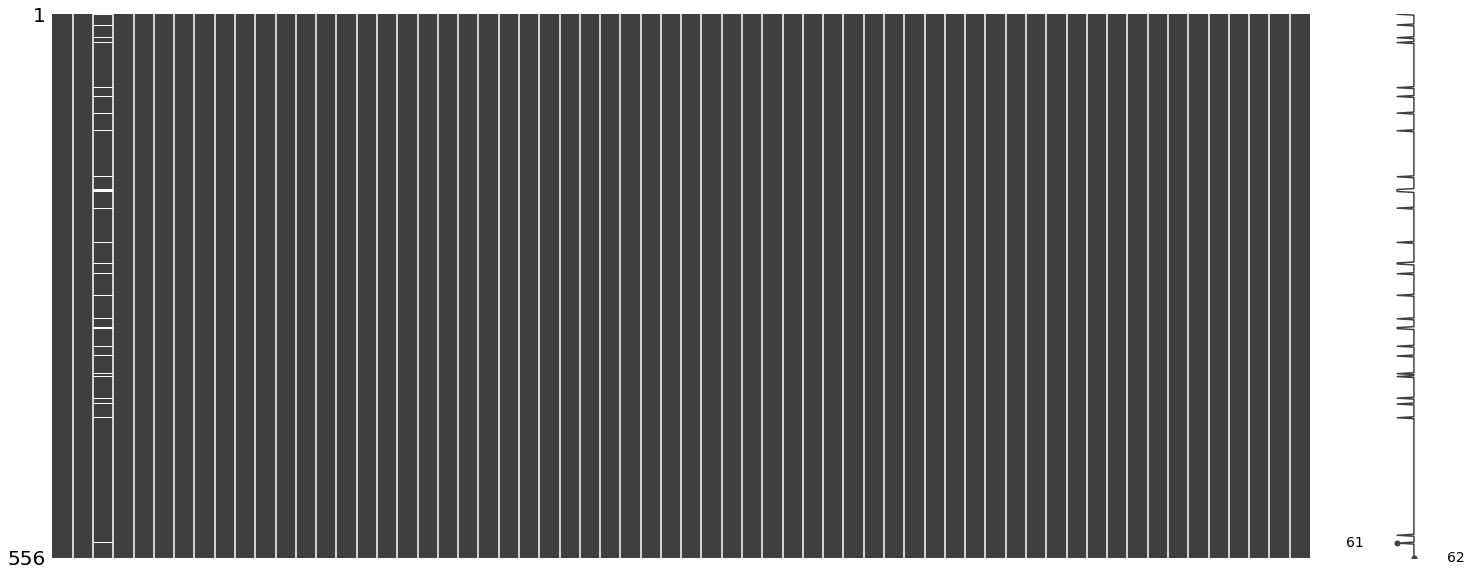

In [6]:
msno.matrix(df)

In [7]:
df.isnull().sum()

Team                         0
Position                     0
Shirt number                30
Name                         0
Minutes played               0
                            ..
Passes                       0
Short passes                 0
Long passes                  0
Through balls                0
Goals scored per attempt     0
Length: 62, dtype: int64

In [8]:
df.shape

(556, 62)

In [9]:
df.loc[df['Shirt number'].isnull()]

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,NaN,Hodei Oleaga,0.000,0,"0,0%",0,"0,0%",0,...,0,0,0,0,0,0.000,0.0,0,0,0
11,Athletic Club,Midfielder,NaN,Nolaskoain,465.000,8,"21,0%",3,"8,0%",4,...,0,11,51,24,27,276.000,253.0,23,0,2
24,Athletic Club,Forward,NaN,Gorka Guruzeta,45.000,6,"16,0%",0,"0,0%",0,...,0,1,20,7,13,9.000,9.0,0,0,0
29,Atlético de Madrid,Goalkeeper,NaN,Alex Dos Santos,0.000,0,"0,0%",0,"0,0%",0,...,0,0,0,0,0,0.000,0.0,0,0,0
75,CD Leganés,Midfielder,NaN,Óscar,2.515,31,"82,0%",16,"42,0%",29,...,73,46,324,255,69,950.000,842.0,106,2,2
84,CD Leganés,Forward,NaN,Youssef En-Nesyri,2.104,31,"82,0%",13,"34,0%",22,...,1,16,472,213,259,465.000,439.0,26,0,2
101,D. Alavés,Midfielder,NaN,Álex Blanco,14.000,2,"5,0%",0,"0,0%",0,...,0,1,4,4,0,6.000,6.0,0,0,0
119,FC Barcelona,Defender,NaN,Jeison Murillo,202.000,3,"8,0%",2,"5,0%",2,...,0,4,27,13,14,142.000,121.0,21,0,0
166,Girona FC,Goalkeeper,NaN,J. Suárez,0.000,0,"0,0%",0,"0,0%",0,...,0,0,0,0,0,0.000,0.0,0,0,0
179,Girona FC,Midfielder,NaN,Kevin Soni,78.000,5,"13,0%",0,"0,0%",1,...,0,3,33,28,5,22.000,21.0,1,0,0


In [10]:
club_through = pd.DataFrame(df.groupby('Team')['Through balls'].mean())

In [11]:
club_through.sort_values('Through balls', axis=0, ascending=False, inplace=True, kind='quicksort')

In [12]:
plt.style.use('ggplot')

<AxesSubplot:ylabel='Team'>

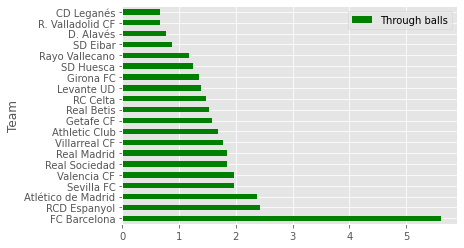

In [13]:
club_through.plot(kind='barh',color='g')

# plt.rcParams()

In [14]:
df.columns

Index(['Team', 'Position', 'Shirt number', 'Name', 'Minutes played',
       'Games played', 'Percentage of games played', 'Full games played',
       'Percentage of full games played', 'Games started',
       'Percentage of games started', 'Games where substituted',
       'Percentage of games where substituted', 'Yellow Cards', 'Red Cards',
       'Second Yellows', 'Goals scored', 'Penalties scored', 'Own goals',
       'Goals conceded while player on pitch', 'Tackles', 'Interceptions',
       'Recoveries', 'Clearances', 'Successful tackles',
       'Unssuccessful tackles', 'Last man', 'Successful duels', 'Duels lost',
       'Successful aerial challenges', 'Unsuccessful aerial challenges',
       'Offsides', 'Fouls suffered', 'Fouls committed', 'Penalties won',
       'Penalties given away', 'Handballs committed',
       'Fouls committed per card', 'Shots', 'Shots on target', 'Assists',
       'Successful dribbles', 'Unsuccessful dribbles', 'Goals scored.1',
       'From inside the a

<AxesSubplot:xlabel='Team'>

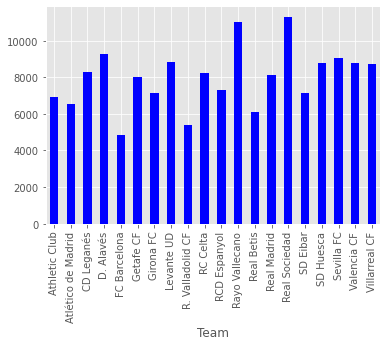

In [15]:
df.groupby('Team')['Short passes'].sum().plot.bar(color='b')

In [16]:
teams = df['Team'].unique()

In [17]:
# players = df['Name']

In [18]:
df.head()

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,NaN,Hodei Oleaga,0.000,0,"0,0%",0,"0,0%",0,...,0,0,0,0,0,0.0,0.0,0,0,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,"0,0%",0,"0,0%",0,...,0,0,0,0,0,0.0,0.0,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,"82,0%",31,"82,0%",31,...,0,0,25,6,19,887.0,128.0,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,"18,0%",7,"18,0%",7,...,0,0,3,2,1,155.0,49.0,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,"32,0%",11,"29,0%",11,...,0,15,107,38,69,536.0,457.0,78,1,0


In [19]:
df.drop(columns=['Shirt number','Percentage of full games played','Games where substituted',
       'Percentage of games where substituted'],inplace=True)

In [20]:
df.head()

,Team,Position,Name,Minutes played,Games played,Percentage of games played,Full games played,Games started,Percentage of games started,Yellow Cards,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,Hodei Oleaga,0.000,0,"0,0%",0,0,"0,0%",0,...,0,0,0,0,0,0.0,0.0,0,0,0
1,Athletic Club,Goalkeeper,A. Remiro,0.000,0,"0,0%",0,0,"0,0%",0,...,0,0,0,0,0,0.0,0.0,0,0,0
2,Athletic Club,Goalkeeper,Herrerín,2.790,31,"82,0%",31,31,"82,0%",1,...,0,0,25,6,19,887.0,128.0,759,1,0
3,Athletic Club,Goalkeeper,Unai Simón,630.000,7,"18,0%",7,7,"18,0%",2,...,0,0,3,2,1,155.0,49.0,106,0,0
4,Athletic Club,Defender,Núñez,1.063,12,"32,0%",11,11,"29,0%",4,...,0,15,107,38,69,536.0,457.0,78,1,0


<AxesSubplot:xlabel='Name'>

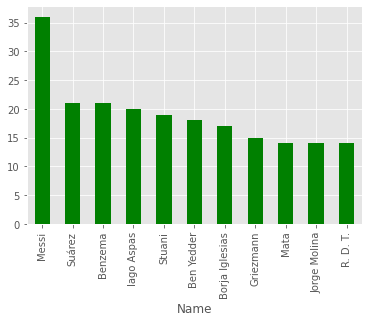

In [21]:
goals_scored = df.set_index('Name')['Goals scored'].nlargest(11).plot.bar(color='g')
goals_scored

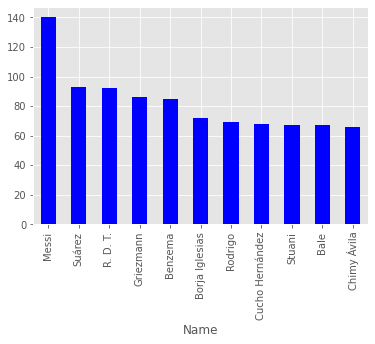

In [22]:
shots = df.set_index('Name')['Shots'].nlargest(11).plot.bar(color='b')

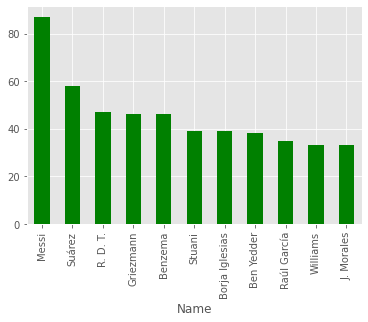

In [23]:
shots_on  = df.set_index('Name')['Shots on target'].nlargest(11).plot.bar(color='g')

<AxesSubplot:xlabel='Name'>

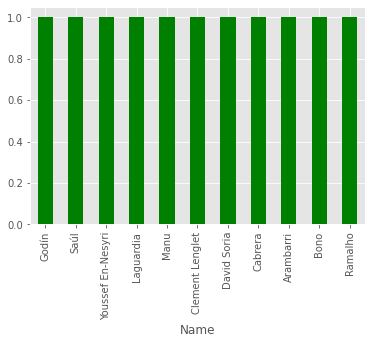

In [24]:
df.set_index('Name')['Goals from set piece'].nlargest(11).plot.bar(color='g')

<AxesSubplot:ylabel='Name'>

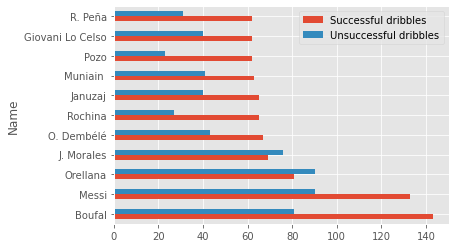

In [36]:
df.set_index('Name')[['Successful dribbles','Unsuccessful dribbles']].nlargest(columns='Successful dribbles',n=11).plot(kind='barh')

<AxesSubplot:xlabel='Name'>

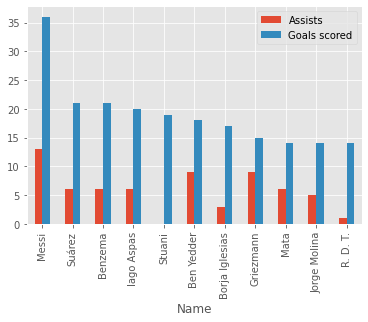

In [45]:
df.set_index('Name')[['Assists','Goals scored']].nlargest(columns='Goals scored',n=11).plot(kind='bar')

# Best Attacking Team

In [46]:
df.columns

Index(['Team', 'Position', 'Name', 'Minutes played', 'Games played',
       'Percentage of games played', 'Full games played', 'Games started',
       'Percentage of games started', 'Yellow Cards', 'Red Cards',
       'Second Yellows', 'Goals scored', 'Penalties scored', 'Own goals',
       'Goals conceded while player on pitch', 'Tackles', 'Interceptions',
       'Recoveries', 'Clearances', 'Successful tackles',
       'Unssuccessful tackles', 'Last man', 'Successful duels', 'Duels lost',
       'Successful aerial challenges', 'Unsuccessful aerial challenges',
       'Offsides', 'Fouls suffered', 'Fouls committed', 'Penalties won',
       'Penalties given away', 'Handballs committed',
       'Fouls committed per card', 'Shots', 'Shots on target', 'Assists',
       'Successful dribbles', 'Unsuccessful dribbles', 'Goals scored.1',
       'From inside the area', 'From outside the area', 'Goals with left foot',
       'Goals with right foot', 'Penalties scored.1',
       'Goals scored wit